This tutorial's purpose is to introduce people to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling, although we may look critically at some other models.

Dashboards such as these inpsired me to put this material together, in order to show people how to dive into the data:

- [Covid-19: active cases and extrapolation](https://covid19-dash.github.io/) by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
- [NYC Covid-19 data dashboard](https://smarquez.shinyapps.io/covid_nys_dashboard/) by Sue Marquez
- All of [these dashboards](https://covid19dashboards.com/) contributed to by many and powered by the work of Hamel Husain.


also [this](https://twitter.com/DrDenaGrayson/status/1241143463925645319/photo/1).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Import data & check it out
raw_data_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [3]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40.0
Albania,0,0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,89.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,201.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,113.0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2.0


In [4]:
df = data_day.transpose()

In [5]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,0.0
1,Albania,1/22/20,0.0
2,Algeria,1/22/20,0.0
3,Andorra,1/22/20,0.0
4,Angola,1/22/20,0.0


In [6]:
data.loc[(data.value < 1),'value'] = None
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,NaN
1,Albania,1/22/20,NaN
2,Algeria,1/22/20,NaN
3,Andorra,1/22/20,NaN
4,Angola,1/22/20,NaN


In [7]:
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
3/5/20,1.0,NaN,12.0,1.0,NaN,NaN,1.0,1.0,55.0,41.0,...,NaN,1.0,29.0,116.0,NaN,NaN,NaN,16.0,NaN,NaN
3/6/20,1.0,NaN,17.0,1.0,NaN,NaN,2.0,1.0,60.0,55.0,...,NaN,1.0,29.0,164.0,NaN,NaN,NaN,16.0,NaN,NaN
3/7/20,1.0,NaN,17.0,1.0,NaN,NaN,8.0,1.0,63.0,79.0,...,NaN,1.0,45.0,207.0,NaN,NaN,NaN,18.0,NaN,NaN
3/8/20,4.0,NaN,19.0,1.0,NaN,NaN,12.0,1.0,76.0,104.0,...,NaN,1.0,45.0,274.0,NaN,NaN,NaN,30.0,NaN,NaN
3/9/20,4.0,2.0,20.0,1.0,NaN,NaN,12.0,1.0,91.0,131.0,...,NaN,1.0,45.0,322.0,NaN,NaN,NaN,30.0,NaN,NaN


In [8]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [9]:
# Check out index
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-02', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-01',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-02', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-03',
      

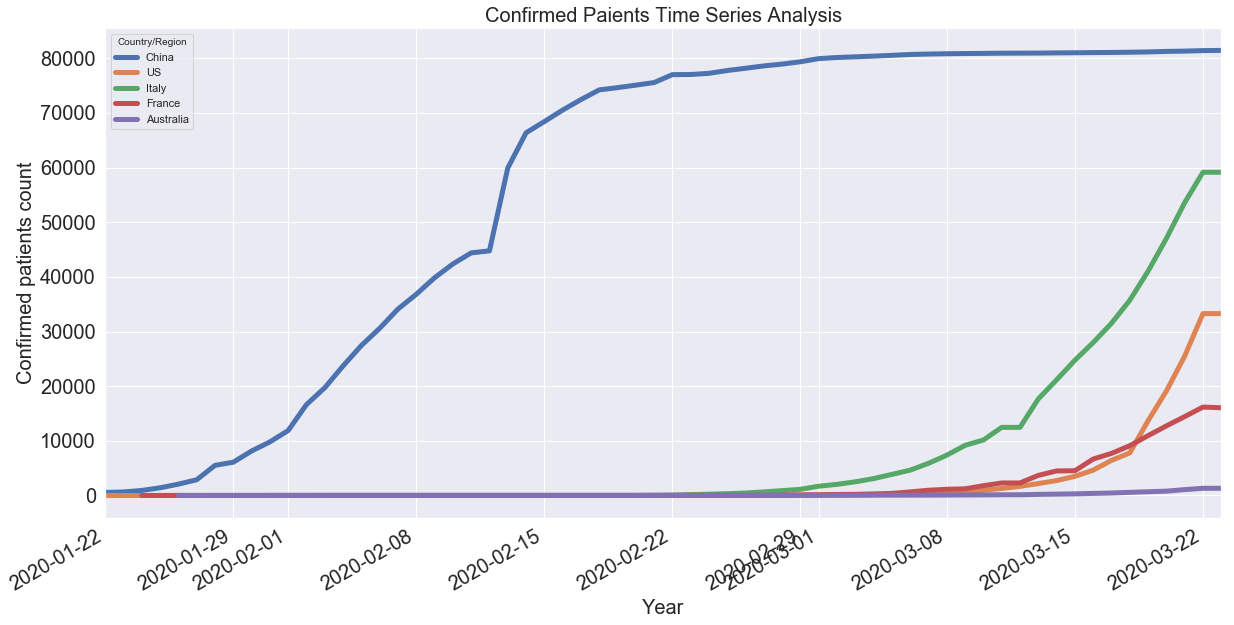

In [10]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Confirmed patients count', fontsize=20);
plt.title('Confirmed Paients Time Series Analysis', fontsize=20);

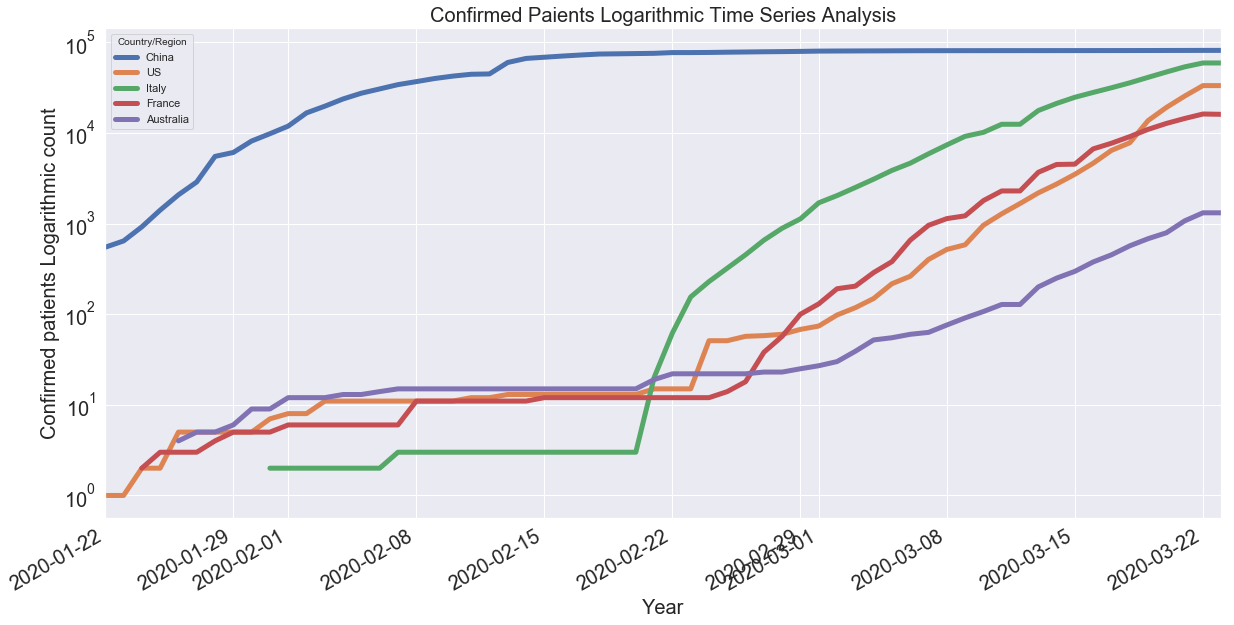

In [11]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Confirmed patients Logarithmic count', fontsize=20);
plt.title('Confirmed Paients Logarithmic Time Series Analysis', fontsize=20);

## Deaths

[This](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html) and [this](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

In [12]:
# Import data & check it out
raw_data_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [13]:
# Group by region
data_day = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
#
data.loc[(data.value < 25),'value'] = None
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

In [14]:
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


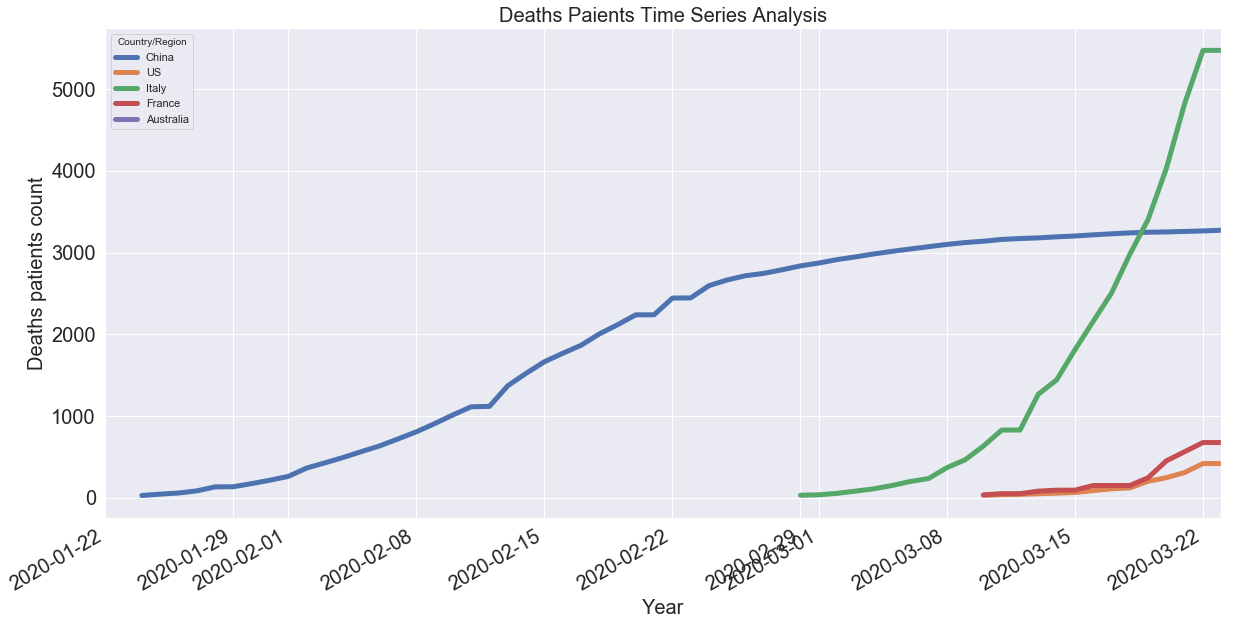

In [15]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Deaths patients count', fontsize=20);
plt.title('Deaths Paients Time Series Analysis', fontsize=20);

In [16]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

Country/Region,Belgium,Brazil,China,France,Germany,Indonesia,Iran,Italy,Japan,"Korea, South",Netherlands,Philippines,Spain,Switzerland,Turkey,US,United Kingdom
date,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.sort_index()
df1 = df.reset_index().drop(['date'], axis=1)
df1.head()

Country/Region,Belgium,Brazil,China,France,Germany,Indonesia,Iran,Italy,Japan,"Korea, South",Netherlands,Philippines,Spain,Switzerland,Turkey,US,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for col in df1.columns:
    print(col, df1[col].first_valid_index())
    df1[col] = df1[col].shift(-df1[col].first_valid_index())

Belgium 58
Brazil 60
China 2
France 48
Germany 56
Indonesia 57
Iran 36
Italy 38
Japan 54
Korea, South 40
Netherlands 55
Philippines 60
Spain 47
Switzerland 55
Turkey 60
US 48
United Kingdom 54


In [19]:
df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))

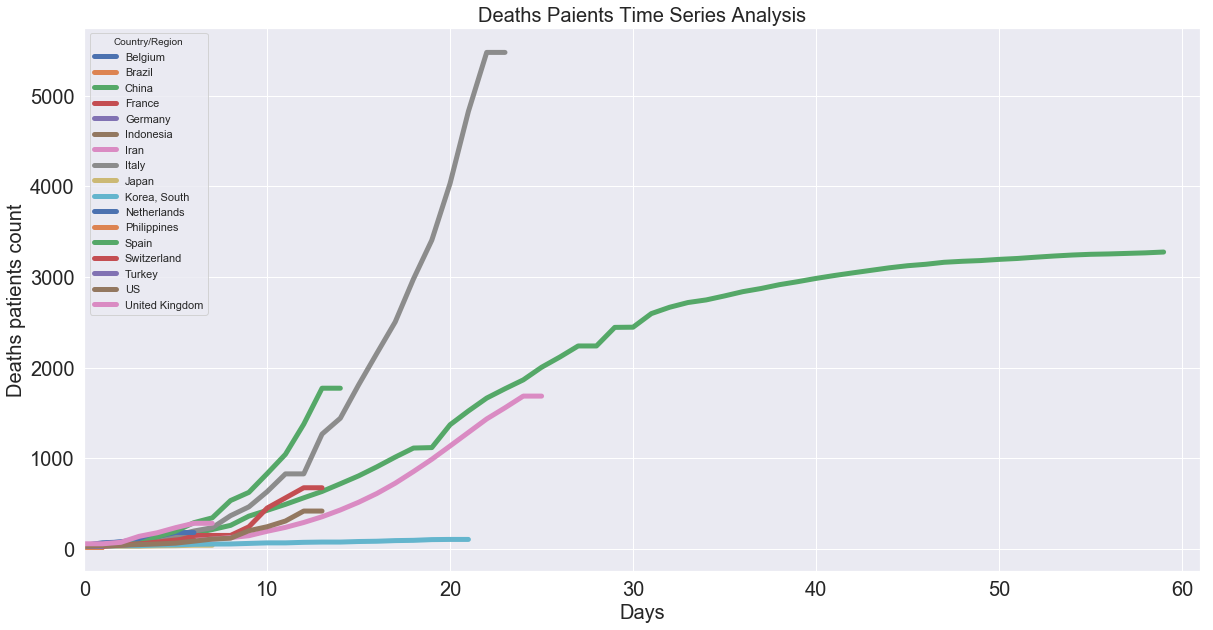

In [20]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths patients count', fontsize=20);
plt.title('Deaths Paients Time Series Analysis', fontsize=20);

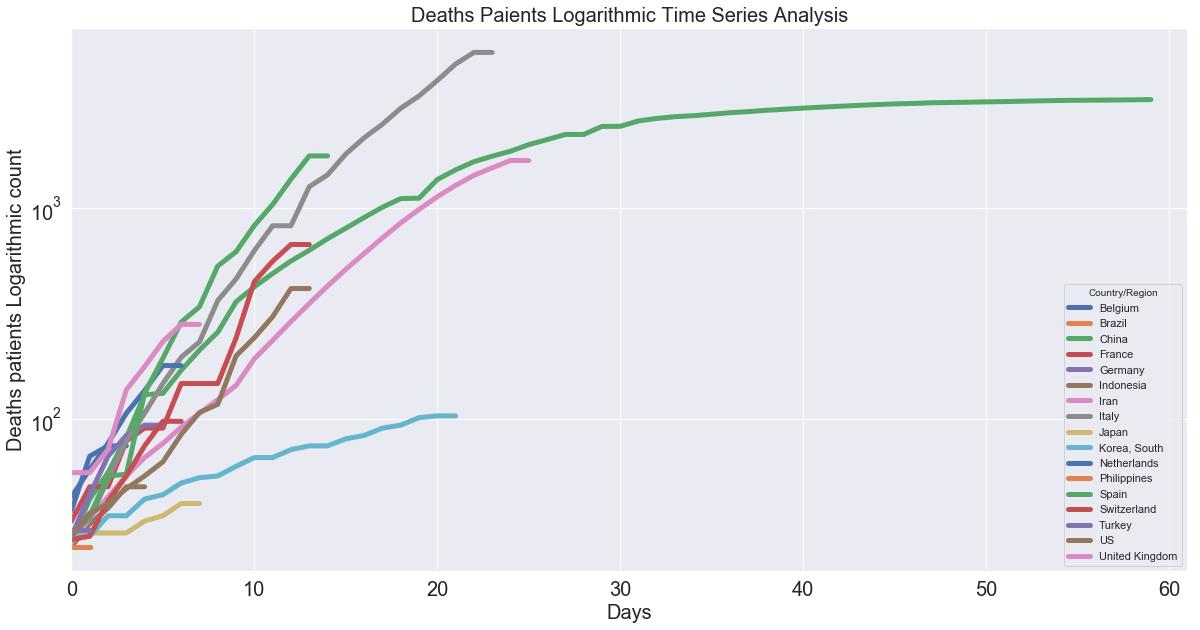

In [21]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths patients Logarithmic count', fontsize=20);
plt.title('Deaths Paients Logarithmic Time Series Analysis', fontsize=20);